# SVM и его ядра
__Суммарное количество баллов: 10__

### Задание 1 (7 баллов)

Примените метод SVM (например, из библиотеки sklearn) для датасета blobs2.

Визуализируйте результат (разбиение плоскости и опорные вектора) при разных вариантах ядер (линейное; полиномиальное степеней 2,3,5; RBF).

In [1]:
import time
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score 
from sklearn import preprocessing
from sklearn.decomposition import PCA
import pandas as pd

c:\users\notebook-kharlamov\appdata\local\programs\python\python37-32\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)
c:\users\notebook-kharlamov\appdata\local\programs\python\python37-32\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)


In [ ]:
df = pd.read_csv('../datasets/blobs2.csv')
X, y = df[df.columns[:-1]], df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y)

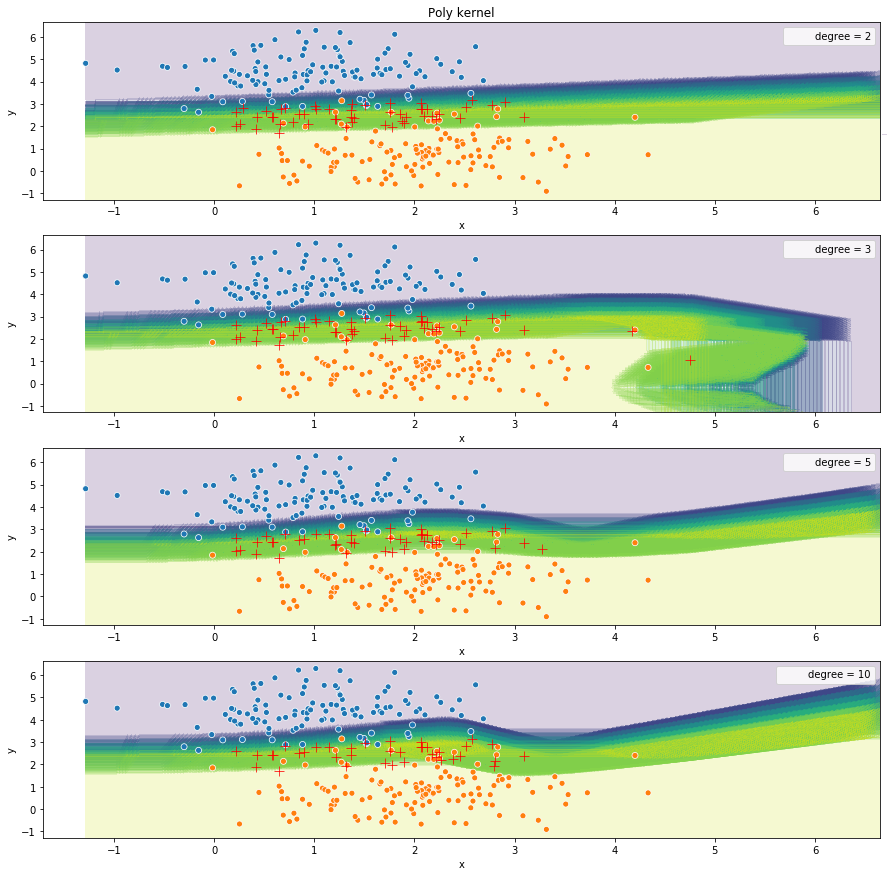

In [150]:
fig, ax = plt.subplots(4, 1, figsize=(15, 15))
degrees = [2, 3, 5, 10]
ax[0].set_title('Polynominal kernel')
for ax, degree in zip(ax.flat, degrees):
    clf = SVC(kernel='poly', degree=degree)
    clf.fit(X_train, y_train)
    x_range = np.linspace(X.min(), X.max(), 200)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.array(list(zip(xx1.reshape(-1), xx2.reshape(-1)))))
    y_hat = y_hat.reshape(xx1.shape)
    ax.contourf(xx1, xx2, y_hat, alpha=0.2)
    sns.scatterplot(X_test['x'], X_test['y'], y_test, ax=ax)
    sns.scatterplot(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], marker='+', s=100, color='r', ax=ax)
    ax.legend([f'degree = {degree}'])

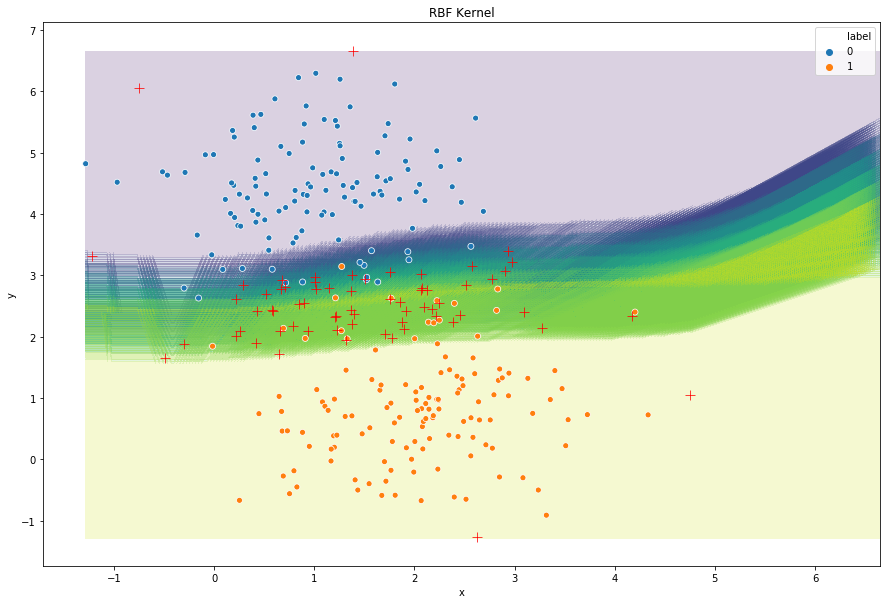

In [145]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
x_range = np.linspace(X.min(), X.max(), 200)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = clf.predict(np.array(list(zip(xx1.reshape(-1), xx2.reshape(-1)))))
y_hat = y_hat.reshape(xx1.shape)
plt.figure(figsize=(15, 10))
plt.title('RBF Kernel')
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
sns.scatterplot(X_test['x'], X_test['y'], y_test)
sns.scatterplot(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], marker='+', s=100, color='r')

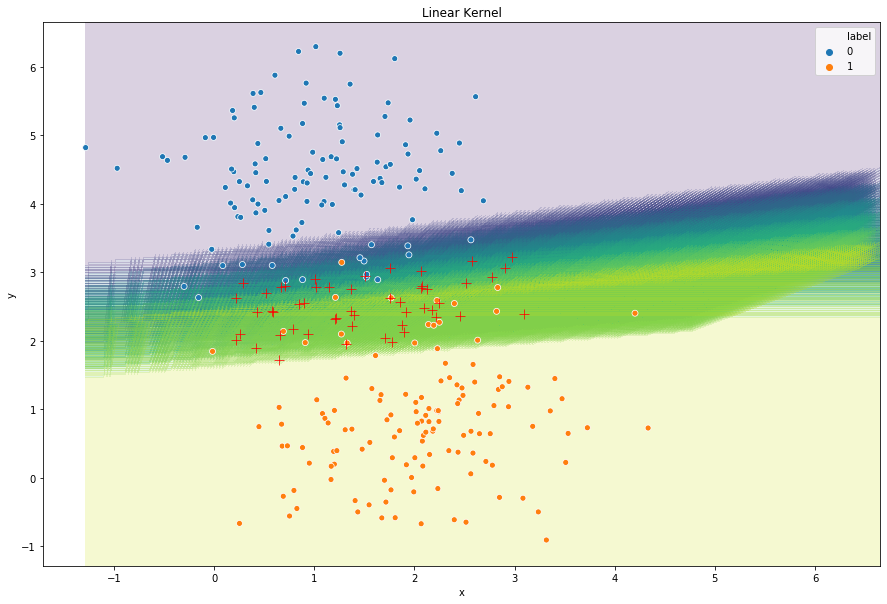

In [151]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
x_range = np.linspace(X.min(), X.max(), 200)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = clf.predict(np.array(list(zip(xx1.reshape(-1), xx2.reshape(-1)))))
y_hat = y_hat.reshape(xx1.shape)
plt.figure(figsize=(15, 10))
plt.title('Linear Kernel')
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
sns.scatterplot(X_test['x'], X_test['y'], y_test)
sns.scatterplot(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], marker='+', s=100, color='r')

### Задание 2 (3 балла)

Примените метод SVM на датасетах cancer и spam, разбитый предварительно на train (80%) и validate (20%). 

Сравните время работы SVM и Random Forest при близкой точности.

### Сравнение на Cancer

In [111]:
df = pd.read_csv('../datasets/cancer.csv')

In [112]:
X, y = df[df.columns[1:]], df['label']
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
tm_1 = time.time()
clf = SVC(kernel='linear', degree=5)
clf.fit(X_train, y_train)
print('SVM roc_auc_score: ', roc_auc_score(y_test, clf.predict(X_test)), 'work s:', time.time() - tm_1)
tm_2 = time.time()
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print('RandomForest roc_auc_score: ', roc_auc_score(y_test, clf.predict(X_test)), 'work s:', time.time() - tm_2)

SVM roc_auc_score:  0.9695225916453538 work s: 3.564016103744507
RandomForest roc_auc_score:  0.9793265132139813 work s: 0.4209878444671631


## Сравнение на Spam

In [91]:
df = pd.read_csv('../datasets/spam.csv')

In [92]:
X, y = df[df.columns[:-1]], df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
tm_1 = time.time()
clf = SVC(kernel='linear', degree=2)
clf.fit(X_train, y_train)
print('SVM roc_auc_score: ', roc_auc_score(y_test, clf.predict(X_test)), 'work s:', time.time() - tm_1)
tm_2 = time.time()
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print('RandomForest roc_auc_score: ', roc_auc_score(y_test, clf.predict(X_test)), 'work s:', time.time() - tm_2)

SVM roc_auc_score:  0.9247933232361479 work s: 1396.0623309612274
RandomForest roc_auc_score:  0.9530938407169002 work s: 1.1886756420135498
